# 1 Introduction:

As the world is progressing our life routines have become more fast-paced. To aid convenience and save time the concept of ordering out, dining-out has increased to a new level not only for entertainment but it has now become an undeniable necessity. However, it is very important to be aware of the nutritional values of the food we put in our bodies.
In the contemporary world, with the rise in trend of consuming highly-processed food, beverages and fast food have caused deteriorating effects on our health. More and more people have faced health problems i.e. Obesity, Diabetes, poor gut health, and other chronic diseases. According to CDC-Centers for Disease Control and Prevention: six in ten adults in the US have a chronic disease and four in ten have 2 or more,  poor nutrition and high sodium and saturated diets along with poor lifestyle are one of the few reasons.
To address this issue, it is very important to spread awareness of the importance of healthy food choices. It is our responsibility to take care of our health by consuming nutritious food and mindful food choices.

# 1.2 Aims & Objectives:

The aim of this project is to perform Exploratory data analysis on a dataset of common food items and their macronutrients.
The objective of this project is to seek insights of macronutrients of most common food items which can aid improve dietary choices and promote healthier choices. 
Over the course of the project, the following objectives will be taken into consideration:
1. Obtain food nutrient data from different sources eg:(various datasets , via API, Webscrapping)
2. Combine data obtained from different sources,clean and prepare the data for further analysis
3. Perform Linear Regression to predict calories - use the data to fuel your "product", e.g. train the calorie predictor
4. 


#  2 Data Description

The dataset consists table with basic food items each weighing grams of its calories, protein, carbohydrates, fiber, fat, and saturated fat however these figures are just estimates. The food items are categorized as Dairy products, Oil, fats and shortenings, Meat&poultry, Fish&Seafood, Vegetables, Fruits, Bread,cereals&grains, Soups, Desserts, Nuts&Seeds,  Beverages and Fast food items.

The data is collected from Wikipedia (https://en.wikipedia.org/wiki/Table_of_food_nutrients), and it has been compiled by the United States Dept. of Agriculture (USDA). I have scraped the website using Python pandas and requests library once a table of each food category is formed by concatenating all the tables into one it has been stored in the pandas data frame.
A request library is used to request the host of the website to use the website. If the request is successful, we can then use the whole page.
Pandas allow us to store the data in a data frame that makes it easier to analyze using a wide range of functions, making the analysis process more convenient and appropriate.


The data is collected mainly from the United States Dept. of Agriculture (USDA). However, scraping each food item would have been very time-consuming and very laborious hence the tables are scraped from Wikipedia (https://en.wikipedia.org/wiki/Table_of_food_nutrients) scraping the website using pandas and request library once a table of each food category is formed by concatenating all the tables into one it has been stored in the pandas data frame. A request library is used to request the host of the website to use the website. If the request is successful, we can then use the whole page. Pandas allow us to store the data in a data frame that makes it easier to analyze using a wide range of functions, making the analysis process more convenient and appropriate.

Another data set has been fetched using the API method from the USDA Food Central Website (https://fdc.nal.usda.gov/fdc-app.html#/). The following steps were taken:
1. The website was signed up to fetch the API key which is required to authenticate requests to the API
2. Install required packages needed to make API requests and handle and analyzing data (requests and pandas)
3. Make API requests
4. Process Data

# 2.2 Initial Process

The data has been retrieved from two sources i.e. Wikipedia and USDA Food Central Website.
 
1. Wikipedia
The process started with loading the data using read_html, It is a quick process to read the HTML table on the website in form of pandas dataframe. The dataset has 16 tables on the website each for different categories but with the same headings, I have decided to scrape all the tables and concatenate them into one data frame and save them as a CSV file. 
The heading for all the tables were same but there was no column for food category, to categorize the different food items I added a column 'Category' to each data frame.

2. USDA Food Central Website: Signed up the USDA website to get API access to proceed with obtaining the dataset. With the aim to add another food category to the nutrition data more food items are scraped from USDA Food Central website and categorised as Fast food. 3tables are fetched and together combined to make one.

Python pandas and requests libraries are imported to scrape the data. Once the data is loaded in the jupyter notebook, it will be stored in Pandas data frame.
Requests allow us to send HTTP requests to URLs very easily. Once request is accepted whole page can be scraped.
Pandas has wide range of functions that make our analysis process more easier , quicker and more efficient.It allows us to store data in tables called dataframe.

Many websites have public APIs that provides data feeds via JSON  or in some other format.There are many ways to get API access but one easy method is to use requests package.

Importing all the necessary libraries:

In [301]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import plotly.express as px
import seaborn as sns 
sns.set(color_codes=True)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline

The food items extracted from USDA Food Central are mainly categorized as fast food items. Three main food items that is 10 sorts of Burger , Pizza and Friend Chicken and their nutritional values are obtained and stored separately in a dataframe . Further are concatenated to make one dataframe in pandas. Following steps are observed.

Step 1: Setting up the API obtained from the Food Central website and defining the URL.

Step 2: Setting the parameters to send get request to the API to obtain data access.

Step 3: Extracting relevant information from the response i.e. (food items, macronutrients and measures ).

Step 4: Creating Pandas data frame from the extracted data.

Step 5: Display the dataframe.

In [302]:
# Set your API key
api_key = 'zXiRetWcQWN8q4SHYTVzRmnQ57GbPBTOIpBxZqun'

# Endpoint URL for food search
url = f"https://api.nal.usda.gov/fdc/v1/foods/search?api_key={api_key}"

# Search query for food items
query =["Burger"]

# Parameters for the search query
params = {
    'query': query,
    'dataType': 'Survey (FNDDS) ',
    'pageSize': 10  # Number of results to retrieve
}

# Send GET request to the API
response = requests.get(url, params=params)
data = response.json()

# Extract relevant information from the response
food_data = []
for food in data['foods']:
    nutrients = food['foodNutrients']
    nutrient_dict = {nutrient['nutrientId']: nutrient['value'] for nutrient in nutrients}
    
    food_item = {
        'Food': food['description'],
        'Measure':0,
        'Grams':100,
        'Calories': nutrient_dict.get(1008, 0),  # Energy (calories)
        'Protein': nutrient_dict.get(1003, 0),  # Protein
        'Carb.': nutrient_dict.get(1005, 0),  # Carbohydrate, by difference
        'Fiber': nutrient_dict.get(1079, 0),  # Fiber, total dietary
        'Fat': nutrient_dict.get(1004, 0),  # Total lipid (fat)
        'Sat. fat': nutrient_dict.get(1259,0),
        'Category':'Fast Food'
    }
    food_data.append(food_item)

# Create a DataFrame from the extracted data
df1 = pd.DataFrame(food_data)

# Display the DataFrame
df1


,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Veggie burger, on bun",0,100,224,13.0,30.8,3.5,5.20,0.002,Fast Food
1,Cheeseburger (Burger King),0,100,261,13.9,23.9,1.0,11.80,0.056,Fast Food
2,Hamburger (Burger King),0,100,254,13.6,26.0,1.1,10.20,0.002,Fast Food
3,Whopper (Burger King),0,100,226,11.3,17.3,1.5,12.40,0.002,Fast Food
4,"Veggie burger patty, no bun",0,100,177,15.7,14.3,4.9,6.30,0.000,Fast Food
5,"Veggie burger, on bun, with cheese",0,100,243,14.0,27.2,3.0,8.49,0.087,Fast Food
6,Double cheeseburger (Burger King),0,100,273,16.2,17.2,0.7,15.00,0.076,Fast Food
7,Whopper Jr (Burger King),0,100,216,10.7,21.1,1.0,9.59,0.002,Fast Food
8,Whopper with cheese (Burger King),0,100,268,13.7,17.7,1.1,15.80,0.077,Fast Food
9,"Turkey or chicken burger, on wheat bun",0,100,229,20.8,19.1,2.0,7.73,0.002,Fast Food


In [303]:
# Set your API key
api_key = 'zXiRetWcQWN8q4SHYTVzRmnQ57GbPBTOIpBxZqun'

# Endpoint URL for food search
url = f"https://api.nal.usda.gov/fdc/v1/foods/search?api_key={api_key}"

# Search query for food items
query =["Pizza"]

# Parameters for the search query
params = {
    'query': query,
    'dataType': 'Survey (FNDDS) ',
    'pageSize': 10  # Number of results to retrieve
}

# Send GET request to the API
response = requests.get(url, params=params)
data = response.json()

# Extract relevant information from the response
food_data = []
for food in data['foods']:
    nutrients = food['foodNutrients']
    nutrient_dict = {nutrient['nutrientId']: nutrient['value'] for nutrient in nutrients}
    
    food_item = {
        'Food': food['description'],
        'Measure':0,
        'Grams':100,
        'Calories': nutrient_dict.get(1008, 0),  # Energy (calories)
        'Protein': nutrient_dict.get(1003, 0),  # Protein
        'Carb.': nutrient_dict.get(1005, 0),  # Carbohydrate, by difference
        'Fiber': nutrient_dict.get(1079, 0),  # Fiber, total dietary
        'Fat': nutrient_dict.get(1004, 0),  # Total lipid (fat)
        'Sat. fat': nutrient_dict.get(1259,0),
        'Category':'Fast Food'
    }
    food_data.append(food_item)

# Create a DataFrame from the extracted data
df2= pd.DataFrame(food_data)

# Display the DataFrame
df2


,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,Dessert pizza,0,100,204,1.86,32.30,1.7,7.54,0.019,Fast Food
1,Mexican pizza,0,100,249,15.50,15.30,2.1,14.00,0.037,Fast Food
2,Pizza rolls,0,100,345,9.19,53.40,1.3,10.50,0.053,Fast Food
3,Breakfast pizza with egg,0,100,292,14.00,25.60,1.1,14.50,0.104,Fast Food
4,"Pizza, no cheese, thick crust",0,100,292,7.58,38.30,1.9,12.30,0.001,Fast Food
5,Topping from cheese pizza,0,100,230,16.90,7.62,1.0,14.70,0.269,Fast Food
6,Topping from vegetable pizza,0,100,247,15.60,12.20,1.9,15.60,0.237,Fast Food
7,Topping from meat pizza,0,100,321,19.20,5.65,0.7,24.50,0.173,Fast Food
8,"Pizza with pepperoni, stuffed crust",0,100,296,12.90,27.20,1.5,15.00,0.158,Fast Food
9,"Pizza, cheese, stuffed crust",0,100,274,12.20,30.00,1.7,11.60,0.175,Fast Food


In [304]:
# Set your API key
api_key = 'zXiRetWcQWN8q4SHYTVzRmnQ57GbPBTOIpBxZqun'

# Endpoint URL for food search
url = f"https://api.nal.usda.gov/fdc/v1/foods/search?api_key={api_key}"

# Search query for food items
query =["Fried Chicken"]

# Parameters for the search query
params = {
    'query': query,
    'dataType': 'Survey (FNDDS) ',
    'pageSize': 10  # Number of results to retrieve
}

# Send GET request to the API
response = requests.get(url, params=params)
data = response.json()

# Extract relevant information from the response
food_data = []
for food in data['foods']:
    nutrients = food['foodNutrients']
    nutrient_dict = {nutrient['nutrientId']: nutrient['value'] for nutrient in nutrients}
    
    food_item = {
        'Food': food['description'],
        'Measure':0,
        'Grams':100,
        'Calories': nutrient_dict.get(1008, 0),  # Energy (calories)
        'Protein': nutrient_dict.get(1003, 0),  # Protein
        'Carb.': nutrient_dict.get(1005, 0),  # Carbohydrate, by difference
        'Fiber': nutrient_dict.get(1079, 0),  # Fiber, total dietary
        'Fat': nutrient_dict.get(1004, 0),  # Total lipid (fat)
        'Sat. fat': nutrient_dict.get(1259,0),
        'Category':'Fast Food'
    }
    food_data.append(food_item)

# Create a DataFrame from the extracted data
df3 = pd.DataFrame(food_data)

# Display the DataFrame
df3


,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Rice, fried, with chicken",0,100,173,7.28,27.60,0.9,3.66,0.000,Fast Food
1,"Chicken, meatless, breaded, fried",0,100,234,21.30,8.51,4.3,12.80,0.000,Fast Food
2,"Chicken, fried, with potatoes, vegetable, froz...",0,100,157,10.30,10.60,1.7,8.13,0.035,Fast Food
3,"Chicken fillet sandwich, fried, on wheat bun",0,100,264,13.20,26.60,2.8,11.70,0.000,Fast Food
4,"Chicken fillet sandwich, fried, on white bun",0,100,269,12.40,28.10,1.7,11.70,0.002,Fast Food
5,"Chicken wing, fried, coated, from raw",0,100,289,19.40,5.96,0.2,20.20,0.000,Fast Food
6,"Chicken wing, fried, coated, from restaurant",0,100,323,17.80,15.00,0.3,21.30,0.000,Fast Food
7,"Fried chicken chunks, Puerto Rican style",0,100,350,21.10,20.80,0.9,19.90,0.001,Fast Food
8,"Chicken fillet sandwich, fried, from fast food",0,100,281,12.20,27.50,1.7,13.50,0.002,Fast Food
9,"Chicken fillet sandwich, fried, on wheat bun, ...",0,100,277,14.20,23.80,2.5,13.90,0.078,Fast Food


Concatenating all three dataframe to one dataframe on pandas to avoid confusion and form a seprate category 'Fast food'

In [305]:
USDAnutreints_data = pd.concat([df1,df2,df3])
USDAnutreints_data.head()

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Veggie burger, on bun",0,100,224,13.0,30.8,3.5,5.2,0.002,Fast Food
1,Cheeseburger (Burger King),0,100,261,13.9,23.9,1.0,11.8,0.056,Fast Food
2,Hamburger (Burger King),0,100,254,13.6,26.0,1.1,10.2,0.002,Fast Food
3,Whopper (Burger King),0,100,226,11.3,17.3,1.5,12.4,0.002,Fast Food
4,"Veggie burger patty, no bun",0,100,177,15.7,14.3,4.9,6.3,0.000,Fast Food


In [306]:
USDAnutreints_data=pd.DataFrame(USDAnutreints_data)
USDAnutreints_data

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Veggie burger, on bun",0,100,224,13.00,30.80,3.5,5.20,0.002,Fast Food
1,Cheeseburger (Burger King),0,100,261,13.90,23.90,1.0,11.80,0.056,Fast Food
2,Hamburger (Burger King),0,100,254,13.60,26.00,1.1,10.20,0.002,Fast Food
3,Whopper (Burger King),0,100,226,11.30,17.30,1.5,12.40,0.002,Fast Food
4,"Veggie burger patty, no bun",0,100,177,15.70,14.30,4.9,6.30,0.000,Fast Food
5,"Veggie burger, on bun, with cheese",0,100,243,14.00,27.20,3.0,8.49,0.087,Fast Food
6,Double cheeseburger (Burger King),0,100,273,16.20,17.20,0.7,15.00,0.076,Fast Food
7,Whopper Jr (Burger King),0,100,216,10.70,21.10,1.0,9.59,0.002,Fast Food
8,Whopper with cheese (Burger King),0,100,268,13.70,17.70,1.1,15.80,0.077,Fast Food
9,"Turkey or chicken burger, on wheat bun",0,100,229,20.80,19.10,2.0,7.73,0.002,Fast Food


In [307]:
print(USDAnutreints_data.columns)

Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Carb.', 'Fiber',
       'Fat', 'Sat. fat', 'Category'],
      dtype='object')


To obtain nutritional data from the Wikipedia website the foremost step is to get requests from the website if its 200 means website is available to use.

In [308]:

url= "https://en.wikipedia.org/wiki/Table_of_food_nutrients"
request_handlers= requests.get(url)
request_handlers


<Response [200]>

Read_html is a pandas function that reads HTML tables in dataframe objects. The function takes the HTML page and extracts all the relevant information such as tables, paragraphs, headers, text, etc. Read_html is a relatively easier method than scraping each item or category separately.

In [309]:

df=pd.read_html(url, header=1)


pd.read_html has extracted all the tables into separate data frames. There are 16 tables in total each representing separate category.

In [310]:
df[0].head(5)

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat
0,"Cows' milk, whole",1 qt.,976.0,660.0,32.0,48,0.0,40,36
1,skim,1 qt.,984.0,360.0,36.0,52,0.0,t,t
2,"Buttermilk, cultured",1 cup,246.0,127.0,9.0,13,0.0,5,4
3,"Evaporated, undiluted",1 cup,252.0,345.0,16.0,24,0.0,20,18
4,Fortified milk,6 cups,1419.0,1373.0,89.0,119,1.4,42,23


In [311]:
df[1].head(5)

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat
0,Butter,1T.,14.0,100.0,t,t,0.0,11.0,10.0
1,Butter,1/2 cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,or,1/4 lb.,112.0,800.0,t,1,0.0,90.0,80.0
3,Hydrogenated cooking fat,1/2 cup,100.0,665.0,0,0,0.0,100.0,88.0
4,Lard,1/2 cup,110.0,992.0,0,0,0.0,110.0,92.0


In [312]:

df[2].head(5)

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat
0,"Bacon, crisp, drained",2 slices,16.0,95.0,4.0,1.0,0,8.0,7.0
1,"Beef, chuck, pat-roasted",3 oz.,85.0,245.0,23.0,0.0,0,16.0,15.0
2,"Hamburger, commercial",3 oz.,85.0,245.0,21.0,0.0,0,17.0,15.0
3,Ground lean,3 oz.,85.0,185.0,24.0,0.0,0,10.0,9.0
4,"Roast beef,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each data frame represents a separate category, to make it more convenient to read a new column needs to be added named 'Category', hence assigning new column to each dataframe.

In [313]:
# Adding  a new column to each dataframe 
df[0]['Category']= 'Dairy Products'
df[1]['Category']= 'Oil, Fats & Shortenings' 
df[2]['Category']= 'Meat & Poultry'
df[3]['Category']= 'Fish & SeaFood'
df[4]['Category']= 'Vegetables'
df[5]['Category']= 'Vegetables'
df[6]['Category']= 'Vegetables'
df[7]['Category']= 'Fruits'
df[8]['Category']= 'Fruits'
df[9]['Category']= 'Fruits'
df[10]['Category']= 'Bread,Cereals & Grains'
df[11]['Category']= 'Bread,Cereals & Grains'
df[12]['Category']= 'Soups'
df[13]['Category']= 'Desserts & Sweets'
df[14]['Category']= 'Nuts & Seeds'
df[15]['Category']= 'Beverages'


Displaying sample dataframe to show each df has now a category column.

In [314]:
df[0].head(5)

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Cows' milk, whole",1 qt.,976.0,660.0,32.0,48,0.0,40,36,Dairy Products
1,skim,1 qt.,984.0,360.0,36.0,52,0.0,t,t,Dairy Products
2,"Buttermilk, cultured",1 cup,246.0,127.0,9.0,13,0.0,5,4,Dairy Products
3,"Evaporated, undiluted",1 cup,252.0,345.0,16.0,24,0.0,20,18,Dairy Products
4,Fortified milk,6 cups,1419.0,1373.0,89.0,119,1.4,42,23,Dairy Products


In [315]:
df[1].head(5)

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,Butter,1T.,14.0,100.0,t,t,0.0,11.0,10.0,"Oil, Fats & Shortenings"
1,Butter,1/2 cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oil, Fats & Shortenings"
2,or,1/4 lb.,112.0,800.0,t,1,0.0,90.0,80.0,"Oil, Fats & Shortenings"
3,Hydrogenated cooking fat,1/2 cup,100.0,665.0,0,0,0.0,100.0,88.0,"Oil, Fats & Shortenings"
4,Lard,1/2 cup,110.0,992.0,0,0,0.0,110.0,92.0,"Oil, Fats & Shortenings"


In [316]:
df[2].head(5)

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Bacon, crisp, drained",2 slices,16.0,95.0,4.0,1.0,0,8.0,7.0,Meat & Poultry
1,"Beef, chuck, pat-roasted",3 oz.,85.0,245.0,23.0,0.0,0,16.0,15.0,Meat & Poultry
2,"Hamburger, commercial",3 oz.,85.0,245.0,21.0,0.0,0,17.0,15.0,Meat & Poultry
3,Ground lean,3 oz.,85.0,185.0,24.0,0.0,0,10.0,9.0,Meat & Poultry
4,"Roast beef,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Meat & Poultry


Concat is a pandas function to join two or more strings to form a new combined string. The datasets are just stiched together if they have common axis.
All separate dataframes are not concatenated to unify and better understand the data to analyse further.


In [317]:
#Concatenate each dataframe in one dataframe 
pd.set_option('display.max_rows',None)
nutreints_data = pd.concat([df[0],df[1],df[2],df[3],df[4],df[5],df[6],df[7],df[8],df[9],df[10],df[11],df[12],df[13],df[14],df[15]])

nutreints_data

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Cows' milk, whole",1 qt.,976.0,660.0,32.0,48,0.0,40,36,Dairy Products
1,skim,1 qt.,984.0,360.0,36.0,52,0.0,t,t,Dairy Products
2,"Buttermilk, cultured",1 cup,246.0,127.0,9.0,13,0.0,5,4,Dairy Products
3,"Evaporated, undiluted",1 cup,252.0,345.0,16.0,24,0.0,20,18,Dairy Products
4,Fortified milk,6 cups,1419.0,1373.0,89.0,119,1.4,42,23,Dairy Products
5,"Powdered milk, whole",1 cup,103.0,515.0,27.0,39,0.0,28,24,Dairy Products
6,"skim, instant",1 1/3 cups,85.0,290.0,30.0,42,0.0,t,t,Dairy Products
7,"skim, non-instant",2/3 cup,85.0,290.0,30.0,42,1.0,t,t,Dairy Products
8,"Goats' milk, fresh",1 cup,244.0,165.0,8.0,11,0.0,10,8,Dairy Products
9,Malted milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dairy Products


Combining both the frames 

In [318]:
nutreints_data=pd.DataFrame(nutreints_data)
nutreints_data
newnutrientsDataFrame=pd.concat([USDAnutreints_data,nutreints_data],axis=0)
newnutrientsDataFrame

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Veggie burger, on bun",0,100.0,224,13.0,30.8,3.5,5.2,0.002,Fast Food
1,Cheeseburger (Burger King),0,100.0,261,13.9,23.9,1.0,11.8,0.056,Fast Food
2,Hamburger (Burger King),0,100.0,254,13.6,26.0,1.1,10.2,0.002,Fast Food
3,Whopper (Burger King),0,100.0,226,11.3,17.3,1.5,12.4,0.002,Fast Food
4,"Veggie burger patty, no bun",0,100.0,177,15.7,14.3,4.9,6.3,0.0,Fast Food
5,"Veggie burger, on bun, with cheese",0,100.0,243,14.0,27.2,3.0,8.49,0.087,Fast Food
6,Double cheeseburger (Burger King),0,100.0,273,16.2,17.2,0.7,15.0,0.076,Fast Food
7,Whopper Jr (Burger King),0,100.0,216,10.7,21.1,1.0,9.59,0.002,Fast Food
8,Whopper with cheese (Burger King),0,100.0,268,13.7,17.7,1.1,15.8,0.077,Fast Food
9,"Turkey or chicken burger, on wheat bun",0,100.0,229,20.8,19.1,2.0,7.73,0.002,Fast Food


Saving the dataframe as csv file and reading the data as csv file

In [319]:
#Saving this dataframe to my personal laptop as CSV
to_csv= newnutrientsDataFrame.to_csv("C:/Users/User/Desktop/CSW1/newnutrientsDataFrame.csv",index=False)
#Reading the data as csv file 
nutreints_data=pd.read_csv("C:/Users/User/Desktop/CSW1/newnutrientsDataFrame.csv")
nutreints_data.head()

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Veggie burger, on bun",0,100.0,224,13.0,30.8,3.5,5.2,0.002,Fast Food
1,Cheeseburger (Burger King),0,100.0,261,13.9,23.9,1.0,11.8,0.056,Fast Food
2,Hamburger (Burger King),0,100.0,254,13.6,26.0,1.1,10.2,0.002,Fast Food
3,Whopper (Burger King),0,100.0,226,11.3,17.3,1.5,12.4,0.002,Fast Food
4,"Veggie burger patty, no bun",0,100.0,177,15.7,14.3,4.9,6.3,0.0,Fast Food


# 3 Cleaning the data 


To start the analysis, it is important to clean the data to enhance the integrity of the analysis. In this section, two main issues of missing values, replacing non-numeric values as all the columns are numeric and dealing with inconsistent data types are addressed.

- Missing values: to cater to missing values, following steps have been used:
   - Used .isna() function to highlight a number of missing values in each column, the dataset returns with boolean values i.e.     True when the value is missing and False when the cell has no missing value.
   - .isna().sum() is used to get a summary of all missing values in each column.
   
  - All the food items with nan values in every column (other than category and food) is a subcategory of the food item, it has been removed from the dataframe using .dropna() function. Dropna() entirely removes the na values from the dataframe.
Replacing non-numeric data from all columns with 0 (t or t') in each column which denotes minuscule amounts. On all other na values .fillna() has been used to fill with 0.
The dataset is cleaned further by removing all the comas and expressions to convert numerical data to int or float

In [320]:
nutreints_data.isna().head()

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [321]:
nutreints_data.isna().sum()

Food         0
Measure     52
Grams       54
Calories    55
Protein     54
Carb.       54
Fiber       54
Fat         55
Sat. fat    57
Category     0
dtype: int64

In [322]:
# Removing all food items with NAN values 
nutreints_data= nutreints_data.dropna()

In [323]:
#Replacing non-numeric values, filling all na other values with 0
nutreints_data=nutreints_data.replace('t',0).replace("t'",0)
nutreints_data.fillna(0,inplace=True)



Checking all the cell have been filled

In [324]:
nutreints_data.isnull().sum()

Food        0
Measure     0
Grams       0
Calories    0
Protein     0
Carb.       0
Fiber       0
Fat         0
Sat. fat    0
Category    0
dtype: int64

In [325]:
nutreints_data=nutreints_data.replace("-1","1").replace("8-44","26").replace("10+","10").replace("a","0").replace("t","0").replace("t'","0")
nutreints_data.head(15)

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Veggie burger, on bun",0,100.0,224,13.0,30.8,3.5,5.2,0.002,Fast Food
1,Cheeseburger (Burger King),0,100.0,261,13.9,23.9,1.0,11.8,0.056,Fast Food
2,Hamburger (Burger King),0,100.0,254,13.6,26.0,1.1,10.2,0.002,Fast Food
3,Whopper (Burger King),0,100.0,226,11.3,17.3,1.5,12.4,0.002,Fast Food
4,"Veggie burger patty, no bun",0,100.0,177,15.7,14.3,4.9,6.3,0.0,Fast Food
5,"Veggie burger, on bun, with cheese",0,100.0,243,14.0,27.2,3.0,8.49,0.087,Fast Food
6,Double cheeseburger (Burger King),0,100.0,273,16.2,17.2,0.7,15.0,0.076,Fast Food
7,Whopper Jr (Burger King),0,100.0,216,10.7,21.1,1.0,9.59,0.002,Fast Food
8,Whopper with cheese (Burger King),0,100.0,268,13.7,17.7,1.1,15.8,0.077,Fast Food
9,"Turkey or chicken burger, on wheat bun",0,100.0,229,20.8,19.1,2.0,7.73,0.002,Fast Food


It is important to change the data type for further data analysis. It is important to change non-numeric data to numeric data to perform mathematical operations, statistical operations, visualizations, data cleaning and predictive modeling.
pd.dtype returns a series of dtype of each column.Columns with mixed types are stored as objects.

In [326]:
#Existing dtypes of the columns
nutreints_data.dtypes

Food         object
Measure      object
Grams       float64
Calories     object
Protein      object
Carb.        object
Fiber        object
Fat          object
Sat. fat     object
Category     object
dtype: object

Changing the dtype object to numeric dtype using pd.numeric function

In [327]:
# A Fix
nutreints_data.loc[nutreints_data['Calories'] == "Aug-44", 'Calories'] = 0

# Converting columns to int and float datatypes
nutreints_data['Grams']=pd.to_numeric(nutreints_data['Grams'])
nutreints_data['Calories']=pd.to_numeric(nutreints_data['Calories'])
nutreints_data['Protein']=pd.to_numeric(nutreints_data['Protein'])
nutreints_data['Carb.']=pd.to_numeric(nutreints_data['Carb.'])
nutreints_data['Fiber']=pd.to_numeric(nutreints_data['Fiber'])
nutreints_data['Fat']=pd.to_numeric(nutreints_data['Fat'])
nutreints_data['Sat. fat']=pd.to_numeric(nutreints_data['Sat. fat'])
nutreints_data.dtypes

Food         object
Measure      object
Grams       float64
Calories    float64
Protein     float64
Carb.       float64
Fiber       float64
Fat         float64
Sat. fat    float64
Category     object
dtype: object

In [328]:
nutreints_data['Grams']=nutreints_data['Grams'].astype(int)
nutreints_data['Protein']=nutreints_data['Protein'].astype(int)
nutreints_data['Fat']=nutreints_data['Fat'].astype(int)
nutreints_data.dtypes

Food         object
Measure      object
Grams         int32
Calories    float64
Protein       int32
Carb.       float64
Fiber       float64
Fat           int32
Sat. fat    float64
Category     object
dtype: object

Quick checks on data:

In [329]:
nutreints_data.head()

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Veggie burger, on bun",0,100,224.0,13,30.8,3.5,5,0.002,Fast Food
1,Cheeseburger (Burger King),0,100,261.0,13,23.9,1.0,11,0.056,Fast Food
2,Hamburger (Burger King),0,100,254.0,13,26.0,1.1,10,0.002,Fast Food
3,Whopper (Burger King),0,100,226.0,11,17.3,1.5,12,0.002,Fast Food
4,"Veggie burger patty, no bun",0,100,177.0,15,14.3,4.9,6,0.000,Fast Food


In [330]:
print(nutreints_data.isnull().any())

Food        False
Measure     False
Grams       False
Calories    False
Protein     False
Carb.       False
Fiber       False
Fat         False
Sat. fat    False
Category    False
dtype: bool


In [331]:
nutreints_data

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Veggie burger, on bun",0,100,224.0,13,30.80,3.50,5,0.002,Fast Food
1,Cheeseburger (Burger King),0,100,261.0,13,23.90,1.00,11,0.056,Fast Food
2,Hamburger (Burger King),0,100,254.0,13,26.00,1.10,10,0.002,Fast Food
3,Whopper (Burger King),0,100,226.0,11,17.30,1.50,12,0.002,Fast Food
4,"Veggie burger patty, no bun",0,100,177.0,15,14.30,4.90,6,0.000,Fast Food
5,"Veggie burger, on bun, with cheese",0,100,243.0,14,27.20,3.00,8,0.087,Fast Food
6,Double cheeseburger (Burger King),0,100,273.0,16,17.20,0.70,15,0.076,Fast Food
7,Whopper Jr (Burger King),0,100,216.0,10,21.10,1.00,9,0.002,Fast Food
8,Whopper with cheese (Burger King),0,100,268.0,13,17.70,1.10,15,0.077,Fast Food
9,"Turkey or chicken burger, on wheat bun",0,100,229.0,20,19.10,2.00,7,0.002,Fast Food


Pandas describe function is the summary statistics of the dataframe. for numeric data, the summary includes count, mean, std, min, max, provides central values lower percentile 50 and upper percentiles. By default, the lower percentile is 25% and 75% upper percentile 50% is the median. 
The function provides an overview of key statistics of the data. the central values, quantiles and percentiles. It shows the shape of dataset's distribution.
Standard deviation , min , max, helps understand variation and speed of the dataframe.

In [332]:
nutreints_data.describe()

,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,139.480447,194.636872,7.765363,23.304302,1.018184,7.832402,4.878911
std,134.199644,178.470178,9.708394,30.554857,3.748343,13.276413,11.065569
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,81.250000,1.000000,5.162500,0.000000,0.000000,0.000000
50%,100.000000,155.000000,4.000000,15.000000,0.400000,3.000000,0.000000
75%,191.750000,263.250000,13.000000,29.000000,1.200000,11.000000,6.000000
max,1419.000000,1373.000000,89.000000,229.000000,67.500000,110.000000,92.000000


## Outliers:

An outlier is an observation that is unlike other observations in the dataset. It is rare, distant, and does not fit in any way. 
Outliers can skew statistical measures and data distributions, providing a misleading representation of the dataset. Catering outliers is crucial for training data before modeling as it will result in a better fit for the data.
Criterias to identify outliers are:
1. Data points that fall outside the 1.5times of an interquartile range above the 3rd quartile and below the 1st quartile.
2. Data points that fall outside the 3 standard deviations, wecan use z-score and if z-score falls outside of 2 standard deviation.

## Visualizing Outliers using boxplots:
Box plots capture the summary of the data distribution, It summarizes sample data using 25th,50th, and 75th quartile. Quartiles, median and outliers are easily visible.
The box represents the interquartile range i.e the range between Q1 and Q3. It shows the variability of the data means most food items are between 100-200grams.
The line inside the box represents the median of the data i.e (median of Grams in nutrients data)
Points beyond the whiskers are outliers in this case anything above approx 380 is an outlier.

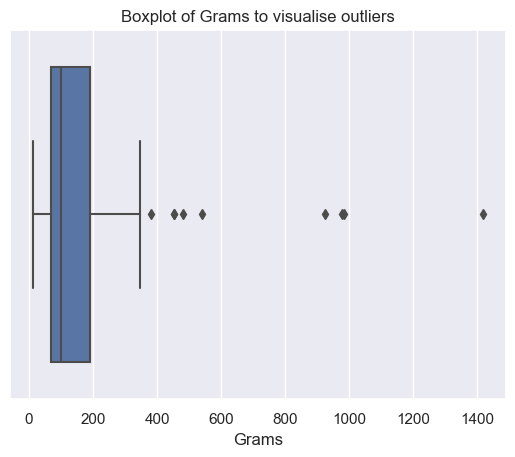

In [333]:

import warnings
from pandas.api.types import CategoricalDtype
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.boxplot(x="Grams",data=nutreints_data)

plt.title("Boxplot of Grams to visualise outliers")
plt.show()

Histogram is the most popular visualisation method to look at outliers .It shows how data is distributed , if a data is normally distributed , statistical method to identify outliers can be decided. 
The histogram of grams shows us that outliers fall 400 and above but the dataset is not normally distributed, hence z-score method to identify outliers will not be the best method. 

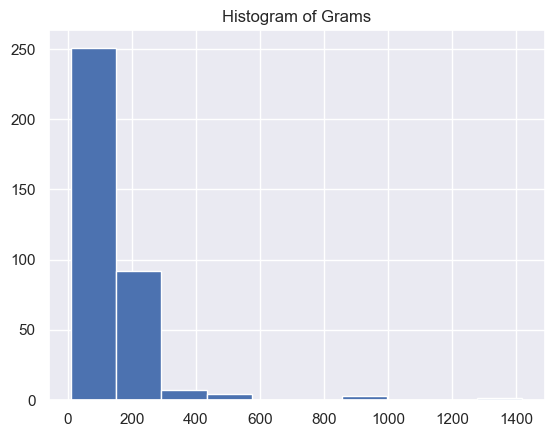

In [334]:
plt.hist(nutreints_data['Grams'])
plt.title('Histogram of Grams')
plt.show()

In [335]:
#Z-SCRORE
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers
outliers=detect_outliers(nutreints_data['Grams'])
fdata=nutreints_data[nutreints_data['Grams'].isin(outliers)]
fdata

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
30,"Cows' milk, whole",1 qt.,976,660.0,32,48.0,0.0,40,36.0,Dairy Products
31,skim,1 qt.,984,360.0,36,52.0,0.0,0,0.0,Dairy Products
34,Fortified milk,6 cups,1419,1373.0,89,119.0,1.4,42,23.0,Dairy Products
283,"Watermelon, 4 by 8""",1 wedge,925,120.0,2,29.0,3.6,1,0.0,Fruits


## InterQuartile Range Method to detect outliers:

Step1:  Sort the data

Step2:  Calculate Q1 and Q2

In [336]:
sorted=nutreints_data['Grams'].sort_values()
q1,q3=np.percentile(sorted,[25,75])
print(q1,q3)

70.0 191.75


Step3: Calculating iqr that is the difference betweer q1 and q3

In [337]:
iqr=q3-q1
print(iqr)

121.75


Step4: Find lower fence and upper fence

In [338]:
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
print(upper_fence,lower_fence)

374.375 -112.625


Since the data is not normal distributed , the outlier points that fall below the lower fence and above the upper fence are all outliers

In [339]:
outliers = nutreints_data[(nutreints_data['Grams'] < lower_fence) | (nutreints_data['Grams'] > upper_fence)]
outliers

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
30,"Cows' milk, whole",1 qt.,976,660.0,32,48.0,0.0,40,36.0,Dairy Products
31,skim,1 qt.,984,360.0,36,52.0,0.0,0,0.0,Dairy Products
34,Fortified milk,6 cups,1419,1373.0,89,119.0,1.4,42,23.0,Dairy Products
40,(1/2 cup ice cream),2 cups,540,690.0,24,70.0,0.0,24,22.0,Dairy Products
229,Cantaloupe,1/2 med.,380,40.0,1,9.0,2.2,0,0.0,Fruits
283,"Watermelon, 4 by 8""",1 wedge,925,120.0,2,29.0,3.6,1,0.0,Fruits
288,"White, 20 slices, or",1-lb. loaf,454,1225.0,39,229.0,9.0,15,12.0,"Bread,Cereals & Grains"
289,Whole-wheat,1-lb. loaf,454,1100.0,48,216.0,67.5,14,10.0,"Bread,Cereals & Grains"
404,Beer (4% alcohol),2 cups,480,228.0,0,8.0,0.0,0,0.0,Beverages


## Treating the outliers:
The following are the techniques to deal with outliers:
1. Delete the outliers
2. Cap the outliers
3. Replace the outliers using imputation 

The method used to cater to outliers in nutrient data is to replace using imputation as the value of the gram is too high hence the higher amount of calories and other macro nutrients, to make it fit with the linear model it is important to cater accordingly.

### Imputation

1. Replacing the outlier gram values with the mean of grams column in the dataset
2. Assigning the mean values of each column to each outlier macronutrients.

In [340]:
gram_mean= int(nutreints_data['Grams'].mean())

outlier_indicies=[30,31,34,40,229,283,288,289,404]

nutreints_data.loc[outlier_indicies,'Grams']=gram_mean


In [341]:
macronutrient_column=['Calories','Protein','Carb.','Fiber','Fat','Sat. fat']

mean_values = nutreints_data[macronutrient_column].mean()

for index in outlier_indicies:
    for column in macronutrient_column:
        original_value=nutreints_data.loc[index,column]
        mean_value=mean_values[column]
        nutreints_data.loc[index,column]=min(original_value,mean_value)

columns_to_convert = ["Grams", "Protein", "Fat"]
nutreints_data[columns_to_convert] = nutreints_data[columns_to_convert].astype(int)
nutreints_data

,Food,Measure,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,"Veggie burger, on bun",0,100,224.000000,13,30.800000,3.500000,5,0.002000,Fast Food
1,Cheeseburger (Burger King),0,100,261.000000,13,23.900000,1.000000,11,0.056000,Fast Food
2,Hamburger (Burger King),0,100,254.000000,13,26.000000,1.100000,10,0.002000,Fast Food
3,Whopper (Burger King),0,100,226.000000,11,17.300000,1.500000,12,0.002000,Fast Food
4,"Veggie burger patty, no bun",0,100,177.000000,15,14.300000,4.900000,6,0.000000,Fast Food
5,"Veggie burger, on bun, with cheese",0,100,243.000000,14,27.200000,3.000000,8,0.087000,Fast Food
6,Double cheeseburger (Burger King),0,100,273.000000,16,17.200000,0.700000,15,0.076000,Fast Food
7,Whopper Jr (Burger King),0,100,216.000000,10,21.100000,1.000000,9,0.002000,Fast Food
8,Whopper with cheese (Burger King),0,100,268.000000,13,17.700000,1.100000,15,0.077000,Fast Food
9,"Turkey or chicken burger, on wheat bun",0,100,229.000000,20,19.100000,2.000000,7,0.002000,Fast Food


# Linear Regression

In [631]:
nutreints_data.dtypes

Food         object
Measure      object
Grams         int32
Calories    float64
Protein       int32
Carb.       float64
Fiber       float64
Fat           int32
Sat. fat    float64
Category     object
dtype: object

1. Independent and dependent features 

In [532]:
nutreints_data_modelling=nutreints_data.drop(columns=['Food','Measure'])
nutreints_data_modelling

,Grams,Calories,Protein,Carb.,Fiber,Fat,Sat. fat,Category
0,100,224.000000,13,30.800000,3.500000,5,0.002000,Fast Food
1,100,261.000000,13,23.900000,1.000000,11,0.056000,Fast Food
2,100,254.000000,13,26.000000,1.100000,10,0.002000,Fast Food
3,100,226.000000,11,17.300000,1.500000,12,0.002000,Fast Food
4,100,177.000000,15,14.300000,4.900000,6,0.000000,Fast Food
5,100,243.000000,14,27.200000,3.000000,8,0.087000,Fast Food
6,100,273.000000,16,17.200000,0.700000,15,0.076000,Fast Food
7,100,216.000000,10,21.100000,1.000000,9,0.002000,Fast Food
8,100,268.000000,13,17.700000,1.100000,15,0.077000,Fast Food
9,100,229.000000,20,19.100000,2.000000,7,0.002000,Fast Food


In [627]:
X = nutreints_data_modelling.drop(columns=['Calories'])
Y = nutreints_data_modelling['Calories']
X_ =nutreints_data_modelling.drop(columns=['Calories','Category'])

In [626]:
X.dtypes

Grams         int32
Protein       int32
Carb.       float64
Fiber       float64
Fat           int32
Sat. fat    float64
Category     object
dtype: object

In [554]:
dummy_categorical_Dataframe=pd.get_dummies(categorical_Dataframe,columns=['Category'],dtype=int)


2. Train Test Split

In [561]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.30,random_state=42)


In [592]:
X_numeric_Dataframe= X_train.select_dtypes(include=['number'])
X_categorical_Dataframe =X_train.select_dtypes(exclude=['number'])
X_dummy_categorical_Dataframe=pd.get_dummies(categorical_Dataframe,columns=['Category'],dtype=int)
X_categorical_Dataframe.dtypes

Category    object
dtype: object

In [598]:
XT_numeric_Dataframe= X_test.select_dtypes(include=['number'])
XT_categorical_Dataframe =X_test.select_dtypes(exclude=['number'])
XT_dummy_categorical_Dataframe=pd.get_dummies(categorical_Dataframe,columns=['Category'],dtype=int)


3. Standardizing dataset

In [587]:
from sklearn.preprocessing import StandardScaler


In [619]:
x_train=pd.concat([X_numeric_Dataframe,X_dummy_categorical_Dataframe],axis=1)
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)


In [620]:
x_test=pd.concat([XT_numeric_Dataframe,XT_dummy_categorical_Dataframe],axis=1)
x_test=scaler.transform(x_test)

In [427]:
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score

In [632]:
regression=LinearRegression()

from sklearn.preprocessing import LabelEncoder

# Assuming 'Y' is your target variable containing non-numeric values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)


regression.fit(X,Y_encoded)

ValueError: could not convert string to float: 'Fast Food'

In [630]:
mean_squared_error = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

ValueError: Found input variables with inconsistent numbers of samples: [358, 250]

In [452]:
np.mean(mean_squared_error)

-1094.0598772199378

In [456]:
#prediction

reg_predict = regression.predict(X_test_encoded[numeric_data] )

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Category_Beverages
- Category_Bread,Cereals & Grains
- Category_Dairy Products
- Category_Desserts & Sweets
- Category_Fast Food
- ...
Feature names seen at fit time, yet now missing:
- Category
- Food
- Measure


# Data Visualisation and Analysis

<pre><span style="color:Blue">
For every new section, try include a list of "Goals" for the section, as well as notes again for "Why?" the section is important.
</span></pre>

This section focuses on analyzing individual food categories, macronutrients and their visualizations.

Identifying the top 20 high protein, high caloric, high fiber food items, High caloric, and fatty food items. Visualizing the categories to better interpret the nutrient data , identify healthy food items using common visualisation tools includes bar chart, scatterplots, piecharts , visualisze the food items using different colors and markers.


Let's start the analysis by individual categories. Protein is a very important source of nutrients so we identify Protein rich food items. 
- Protein-rich food items in the category of vegetables, grains, and nuts

In [ ]:
alls=  ['Vegetables','Fruits','Bread,Cereals & Grains','Nuts & Seeds']

In [ ]:
Food_Category=nutreints_data[nutreints_data['Category'].isin(alls)]
protein_rich=Food_Category.sort_values(by='Protein',ascending=False)
top_20 = protein_rich.head(20)
top_20

In [ ]:
fig=px.bar(top_20,x='Food',y='Protein',color = 'Protein',title='Protein Rich Food Items')
fig.show()

Whole-wheat has the highest protein content followed by white bread in the category of grains but 1 loaf of whole wheat bread has only 48 protein and 1100 calories. Carrots are amongst the top protein rich vegetables. 
Almonds have topped the list in the category of nuts and seeds

In [ ]:
Food_Category
Calorie_rich=Food_Category.sort_values(by='Calories', ascending =False)
top_20=Calorie_rich.head(20)
top_20


In [ ]:
fig= px.bar(top_20, x='Food',y='Calories',color='Calories',title='High Caloric Food Items in Vegetable/Fruits and Grains')
fig.show()

Whole Wheat and white bread have protein but are also high in calories , but protein content is too little per slice. however, soy flour has lower calories but rich in protein. It seems like no vegetable are high in calories.

# High Caloric Food in all categories

In [ ]:
other_category= ['Dairy Products','Oil, Fats & Shortenings','Meat & Poultry','Fish & SeaFood','Soups','Desserts & Sweets','Beverages']
new_category=nutreints_data[nutreints_data['Category'].isin(other_category)]
Calorie_rich=new_category.sort_values(by='Calories', ascending =False)
top_20=Calorie_rich.head(20)
fig= px.bar(top_20, x='Food',y='Calories',color='Calories',title='High Caloric Food Items in Other Categories')
fig.show()

In [ ]:
top_20

Fortified milk has highest amount of calories but one cup of fortified milk contains approx 200 calories on the other hand Lard ,Margarine for 1/2 cup have above 800 calories.By analysing the table we see most high caloric food items are processed eg icecream , sausage , powdered milk etc. these  products should be avoided.

In [ ]:
Fiber_rich=nutreints_data.sort_values(by='Fiber', ascending =False)
top_20=Fiber_rich.head(20)
fig= px.bar(top_20, x='Food',y='Fiber',color='Fiber',title='High Fiber Food Items')
fig.show()

# Foods with High Calories and Fat

In [ ]:
Fat =nutreints_data.sort_values(by='Fat', ascending =False)
fat_top_20=Fat.head(20)
fat_top_20
fig= px.bar(fat_top_20, x='Food',y='Fat',color='Fat',title=' High Fat Food Items')
fig.show()

In [ ]:
fig= px.bar(fat_top_20, x='Food',y='Calories',color='Calories',title=' High Caloric and Fat Food Items')
fig.show()

Oil, Fats and Shortenings have highest amount of fat and calories 
Milk ,cream is high in fat and calories too
Brazil nuts,Almonds ,Pecans ,Cashews, Walnuts- most nuts have topped the high fat content , but nuts are considered healthy if taken in moderation further analysis to identify what other nutrional values nuts have is important.

Category wise Distributions: all the columns are summed by category using groupby function. Dataframe groupby is used where rows/columns are grouped.

In [ ]:
# Grouping the columns by Categories
Food_Category = nutreints_data.groupby(['Category']).sum(numeric_only=True)
Food_Category

In [ ]:
# defined colors 
nutreints_data.columns
colors= ['lightpink','lightblue','lightindigo','lightgreen','mediumturquoise','lightvoilet','lightpurple','lightseagreen','grey','yellow']

In [ ]:
fig = make_subplots(rows= 2, cols=3, specs=[[{"type": "domain"},{"type": "domain"},{"type":"domain"}],[
                                             {"type": "domain"},{"type": "domain"},{"type":"domain"}]])
fig.add_trace(go.Pie(values=Food_Category['Calories'].values,title='Calories',labels=Food_Category.index,
                     marker=dict(colors=colors,line=dict(color='#000000'))),row=1,col=1)
fig.add_trace(go.Pie(values=Food_Category['Fat'].values,title='Fat',labels=Food_Category.index,
                     marker=dict(colors=colors ,line=dict(color='#000000'))),row=1,col=2)
fig.add_trace(go.Pie(values=Food_Category['Protein'].values,title='Protein',labels=Food_Category.index,
                     marker=dict(colors=colors ,line=dict(color='#000000'))),row=1,col=3)
fig.add_trace(go.Pie(values=Food_Category['Fiber'].values,title='Fiber',labels=Food_Category.index,
                     marker=dict(colors=colors ,line=dict(color='#000000'))),row=2,col=1)
fig.add_trace(go.Pie(values=Food_Category['Sat. fat'].values,title='Sat.fat',labels=Food_Category.index,
                     marker=dict(colors=colors ,line=dict(color='#000000'))),row=2,col=2)
fig.add_trace(go.Pie(values=Food_Category['Carb.'].values,title='Carb',labels=Food_Category.index,
                     marker=dict(colors=colors,line=dict(color='#000000'))),row=2,col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height = 700, width=1075)

- Bread,cerealsand grains have highest amount of calories,fiber and carbs. Protein in moderation and low fat content.
- Fruits are high in carbs and fiber
- Dairy Products are high in calories,fat,carbs and protein but very low fiber content
- Meat and Poultry is rich in protein,fat ,moderate calories but very low in carbs
- Desserts have high amount of Carbs and calories with no other significant nutrition
- Vegetables similar to fruits have high amount of fiber and carb 
- Nuts and seeds are low in calories and carbs but have moderate levels of  sat fats
- Oil, fat and shortening only have significant amount of fat and sat.fats
- Fish and Seafood have high content of protein , moderate fat and very low calories and carbs
- Soups are simply low in all nutritional values
- Similar to soup beverages have very low or no nutritional value

In [ ]:
# Analysing Meat and Poultry / Seafood more 
protein = nutreints_data[nutreints_data['Category'].isin(['Fish & SeaFood','Meat & Poultry'])]
High_protein=protein.sort_values(by='Protein',ascending=False)
High_protein = High_protein.head(10)
fig = make_subplots(rows=1, cols=2)
fig= go.Figure(go.Pie(values=High_protein['Protein'].values,labels=High_protein['Food'],text=High_protein['Food'],
                    marker=dict(colors=colors,line=dict(color='#000000'))))
fig.update_layout(title_text="Protein Rich Meat items",height = 600, width=900)
fig.show()

In [ ]:
High_protein

Meat & Poultry and Seafood are protein rich categories , I have analysed both categories further to identify protein rich food items in each category. Flounder has topped the list with approx 12% protein content followed by cod around 11% protein. In meat & poultry roasted turkey has topped the list.

In [ ]:
Calories = nutreints_data[nutreints_data['Category'].isin(['Fish & SeaFood','Meat & Poultry'])]
High_caloric=High_protein.sort_values(by='Calories',ascending=False)
High_caloric = High_caloric.head(10)
fig = make_subplots(rows=1, cols=2)
fig= go.Figure(go.Pie(values=High_caloric['Calories'].values,labels=High_caloric['Food'],text=High_caloric['Food'],
                    marker=dict(colors=colors,line=dict(color='#000000'))))
fig.update_layout(title_text="High Caloric Food",height = 600, width=1200)
fig.show()

The meat & seafood category , the roasted chicken and turkey which are protein rich have high amount of calories whereas fish on the other hand have comparatively lower calories. Therfore fish is rich in protein but low in calories.

In [ ]:
High_Caloric_drinks

<pre><span style="color:Blue">
In this case the `High_Caloric_drinks` variable is used before being assigned, which only happens below, thus the error.
</span></pre>

In [ ]:

drinks = nutreints_data[nutreints_data['Category'].isin(['Beverages'])]
High_Caloric_drinks = drinks.sort_values(by='Calories',ascending=False).head(5)
fig=go.Figure(go.Funnelarea(values=High_Caloric_drinks['Calories'].values,labels=High_Caloric_drinks['Food'],text=High_Caloric_drinks['Food'],
                            marker=dict(colors=colors,line=dict(color='#000000'))))
fig.update_layout(title_text="High Caloric Drinks",height = 550, width=800)

fig.show()

upon analysing beverages , its very evident that beverages are full of calories and carbs and absolutely no other nutrional values which makes it very unhealthy food item.

# High Caloric desserts with most carbs

<pre><span style="color:Blue">
In this case the `High_Carb_desserts` variable is used before being assigned, which only happens below, thus the error.
</span></pre>

In [ ]:
desserts = nutreints_data[nutreints_data['Category'].isin(['Desserts & Sweets'])]

High_CC_desserts = desserts.sort_values(by='Calories',ascending=False).head(5)
High_Carb_desserts = High_CC_desserts.sort_values(by='Carb.',ascending=False).head(5)

fig=go.Figure(go.Funnelarea(values=High_Carb_desserts['Carb.'].values,labels=High_Carb_desserts['Food'],text=High_Carb_desserts['Food'],
                            marker=dict(colors=colors,line=dict(color='#000000'))))
fig.update_layout(title_text="High Caloric Drinks",height = 550, width=800)

fig.show()

<pre><span style="color:Blue">
Do not unnecessarily leave open execution blocks
</span></pre>

In [ ]:
desserts = nutreints_data[nutreints_data['Category'].isin(['Desserts & Sweets'])]

High_CC_desserts = desserts.sort_values(by='Calories',ascending=False).head(5)
High_Carb_desserts = High_CC_desserts.sort_values(by='Carb.',ascending=False).head(5)
High_CCF_desserts = High_Carb_desserts.sort_values(by='Fat',ascending=False).head(5)

fig=go.Figure(go.Funnelarea(values=High_CCF_desserts['Fat'].values,labels=High_CCF_desserts['Food'],text=High_CCF_desserts['Food'],
                            marker=dict(colors=colors,line=dict(color='#000000'))))
fig.update_layout(title_text=" High Carb & Caloric Desserts with high Fat Content",height = 550, width=800)

fig.show()

Similar to carbonated drinks desserts are full of calories and carbs

# Conclusion


<pre><span style="color:Blue">
Here you use good third person descriptions.
</span></pre>

The objective of this analysis was to educate on the nutritional value of common food items , we have identified high protein, high fiber food items , foods with most carbs and calories. 
In a nut shell, Meat and poultry and Seafood is high in proteins. Fish like Flounder, cod, sailbat , tuna have highest amount of protein and poultry meat like turkey chicken legs and steak has good amount  of protein they are high caloric as well but it keeps one full for time and its very important to maintain a protein rich diet to maintain healthy weight.

Nuts and Seeds are high in calories and fat but have many benefits if consumed in adequate amount 
Carbonated drinks and desserts are full of carbs and calories and therefore should be avoided in regular diets.
Fruits and vegetables are fiber rich foods further nutritions are required to analyse it further

It is very important to focus on the quantity of food items, to maintain a well balanced diet it is very important to keep moderation and calorie count each item. 


Further in CW2 i will be doing some in depth analysis on Fruits and vegetables , Good and bad fats , Linear regression , dashboard , relation between the nutrion values 

References:
- The nutrition table (https://en.wikipedia.org/wiki/Table_of_food_nutrients)
- Pandas read_html() documentation: (https://pandas.pydata.org/docs/reference/api/pandas.read_html.html)
- Nutrition data (list of food and its nutritional values (https://www.usda.gov/)
- Webscraping Lecture and lab Data Programming , Sean McGrath
- Kaggle nutrition value analysis (https://www.kaggle.com/code/saad1254/food-nutrition-analysis-eda/edit)
- Group by https://realpython.com/pandas-groupby/
- Matplotlib https://matplotlib.org/
- Pandas DataFrame (https://www.w3schools.com/python/pandas/default.asp)
- Pandas DataFrame (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [ ]:
pip freeze>requirements.txt

<pre><span style="color:Blue">
Remember, having a requirements file is only one part of the puzzle, you need to include a 'readme.txt' file as well,
which describes what the marker should do to get everything running.

I recommend having a virtual environment setup in which the project is run,
Make a .bat file that creates the virtual environment and then installs the requirements automatically.
</span></pre>

---

<pre><span style="color:Blue">
My personal recommendation for CW 2 would be to look at how the fields correlate.
Basically, try and train a model (Maybe Linear Regression) to predict the calories of food based on the other fields, or something like that.

For CW2, in my mind, the idea is to take the data, and the conclusions made in CW1, and create a "product", create something you can "sell".
Doing a categorical distribution description as an example, has very limited applicability in the "real world".

Thus, step 1. 
Start with automating the data collection, through mining, fetching from an API, loading datasets, etc... any of them or a combination of them.

Step 2
Combine and clean the data.

Step 3
Use the data to fuel your "product", e.g. train the calorie predictor

Step 4
Write/provide a function that can be re-run, over and over, which can be fed with data to predict and give an output.


*It is possible to do a data analysis "product", but in that case you should have the idea of a "dashboard" in mind.
Something that makes use of the change of data over time, preferably daily data, so useful info can be shown,
but even in such a case, everything should be justifiable.
</span></pre>